In [ ]:
import numpy as np

In [ ]:
# Load the predictions we got from Prediction.ipynb.
predictions = []
for p in range(11):
    files = np.loadtxt(open('data/Predictions/Predictions'+str(p)+'.csv',"rb"),delimiter=",",skiprows=0)  
    #files = pd.read_csv('data/Predictions'+str(month)+'.csv')
    predictions.append(files)
predictions

[array([[1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.]]),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 1., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 1., 0., 0.]]),
 arr

In [ ]:
# Get the proportion of each emotion in each period.
predictions_p = []
for p in range(11):
    p_list=[]
    for emotion in range(11):
        sum=0
        for pred in range(len(predictions[p])):
            if predictions[p][pred][emotion] == 1:
                sum += 1
        p_list.append(sum/len(predictions[p]))
    predictions_p.append(p_list)
predictions_p

[[0.5581582388734943,
  0.04501431160785849,
  0.616746967038697,
  0.24342665326905616,
  0.2696446613449661,
  0.033665991484264836,
  0.19523467371677886,
  0.05816342549146663,
  0.30838109055904134,
  0.0018851627456987377,
  0.00037343649401222245],
 [0.5789944237152072,
  0.05104233933096359,
  0.6109432380922472,
  0.17855740864687258,
  0.2543932134592397,
  0.03266572321921021,
  0.19219241617417007,
  0.07727992714125606,
  0.2698653919003531,
  0.0037052557612776973,
  0.0006222042517944802],
 [0.5203038511236445,
  0.061225313869632786,
  0.5585684445336919,
  0.22316829349211614,
  0.29788421746494614,
  0.04005712078087621,
  0.2115602463811137,
  0.06863060730936457,
  0.2925944882920952,
  0.0011077109780160295,
  0.00045236078855925545],
 [0.5255762966371921,
  0.06671799219687069,
  0.5470926972408405,
  0.191630963703137,
  0.32769218445148257,
  0.04837897165787735,
  0.24175184930508925,
  0.055149318046067174,
  0.26548865255967263,
  0.0014515949533957376,
  0.0

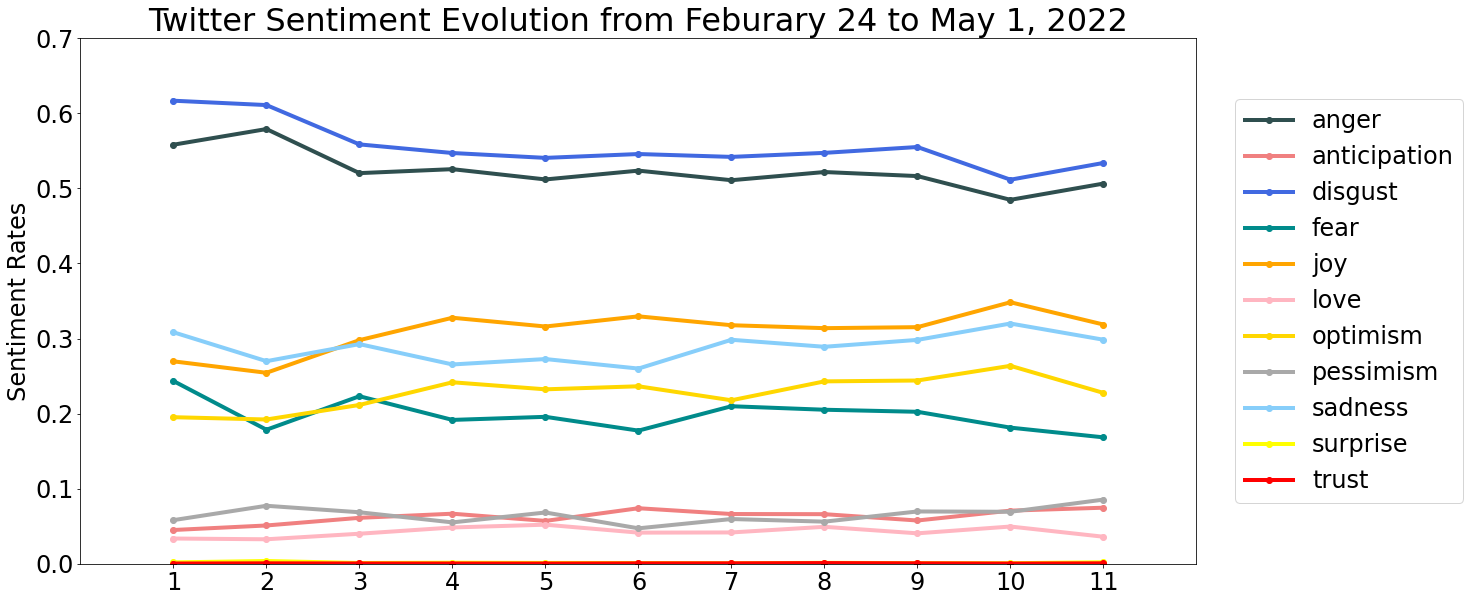

In [ ]:
import matplotlib.pyplot as plt
xperiods = ['1','2','3','4','5','6','7','8','9','10','11']
x = range(len(xperiods))
y=[]
y_sp=[]
for emotion in range(11):
    y_sp=[]
    for p in range(11):
        y_sp.append(predictions_p[p][emotion])
        #print(y_sp)
    y.append(y_sp)

plt.figure(figsize=(20,10))
plt.xlim(-1,11) 
plt.ylim(0,0.7) 
emotions = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
color=['darkslategray','lightcoral','royalblue','darkcyan','orange','lightpink','gold','darkgray', 'lightskyblue','yellow','red']
for i in range(11):
    plt.plot(x, y[i], marker='o',label=emotions[i], linewidth = 4, color = color[i])
plt.legend(fontsize = 24, loc='center right',bbox_to_anchor=(1.25, 0.5)) 
#plt.xticks(x, names, rotation=45)
plt.xticks(x, xperiods,fontsize = 24)
plt.yticks(fontsize = 24)
#plt.margins(0)
plt.subplots_adjust(bottom=0.15)
#plt.xlabel('Time', fontsize = 24)
plt.ylabel("Sentiment Rates", fontsize = 24)
plt.title("Twitter Sentiment Evolution from Feburary 24 to May 1, 2022", fontsize = 32)
plt.show()

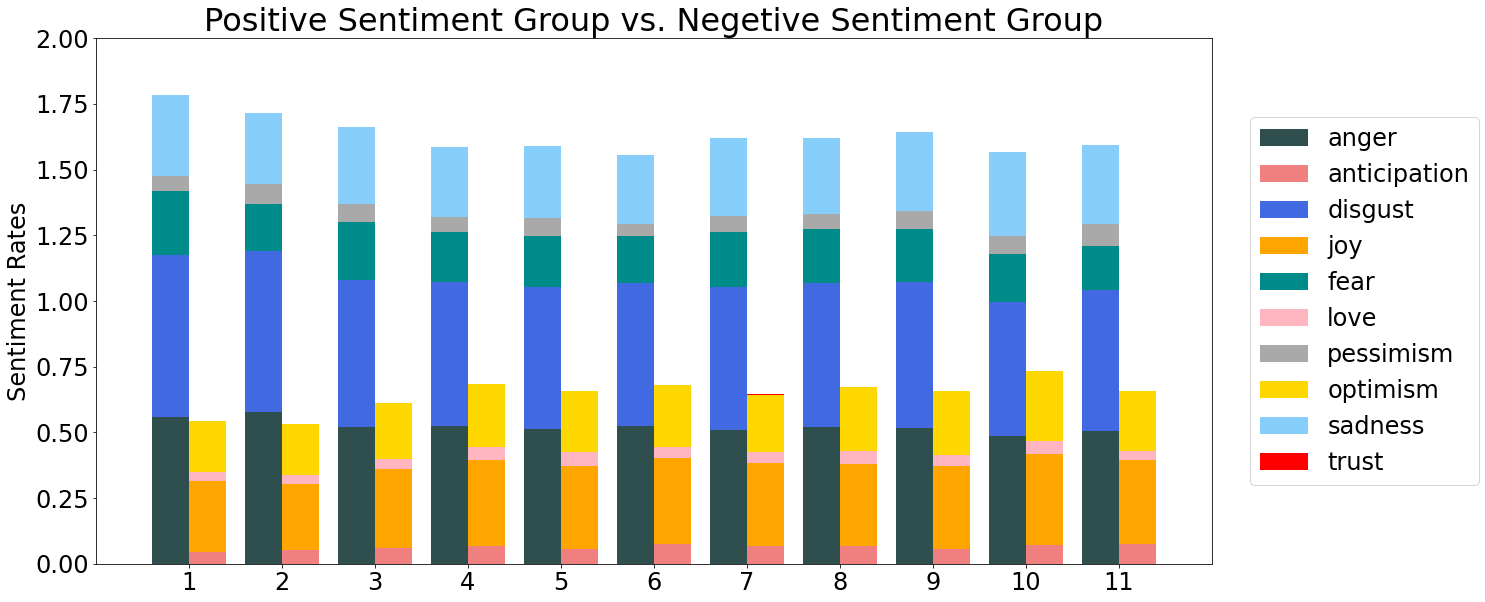

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(-1,11) 
plt.ylim(0,2) 
emotions1 = ['anger','disgust','fear','pessimism','sadness']
emotions2 = ['anticipation','joy','love','optimism','trust']
y1 = [y[0],y[2],y[3],y[7],y[8]]
y2 = [y[1],y[4],y[5],y[6],y[10]]
index = np.arange(len(xperiods))
color1=['darkslategray','royalblue','darkcyan', 'darkgray', 'lightskyblue']
color2=['lightcoral','orange','lightpink', 'gold', 'red']
for i in range(5):
    plt.bar(index-0.2, y1[i],bottom=np.sum(y1[:i],axis = 0), width=0.4,label=emotions1[i],color = color1[i])
    plt.bar(index+0.2, y2[i],bottom=np.sum(y2[:i],axis = 0), width=0.4,label=emotions2[i],color = color2[i])
plt.legend(fontsize = 24, loc='center right',bbox_to_anchor=(1.25, 0.5)) 
#plt.xticks(x, names, rotation=45)
plt.xticks(x, xperiods,fontsize = 24)
plt.yticks(fontsize = 24)
#plt.margins(0)
plt.subplots_adjust(bottom=0.15)
#plt.xlabel('Time', fontsize = 24)
plt.ylabel("Sentiment Rates", fontsize = 24)
plt.title("Positive Sentiment Group vs. Negetive Sentiment Group", fontsize = 32)
plt.show()